In this notebook we are going to visualize the dataset which have cleaned Genres, Director, Cast and alreday have combined with information from the CMU dataset as long as the popularity and imdb_id form the Kaggle IMDB dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

In [2]:
data = pd.read_csv('../wiki_plots_with_genres.csv.zip')
data2 = pd.read_csv('../Data/wiki_plots_with_genres_c3.zip')
data = data.drop(columns = ['Unnamed: 0'])
data2 = data2.drop(columns = ['Unnamed: 0'])

In [3]:
origin_count = data2.Origin.value_counts().to_frame().reset_index()
origin_count = origin_count.rename(columns={"index": "iso_a3", "Origin": "Count"})
new_ind = ['USA', 'GBR', 'IND', 'IND', 'IND', 'JPN',
       'IND', 'CHN', 'CAN', 'AUS', 'KOR',
       'CHN', 'IND', 'IND', 'RUS', 'IND', 'PHL',
       'BGD', 'IND', 'TUR', 'MYS', 'EGY',
       'IND', 'MDV']
origin_count['iso_a3'] = new_ind

In [4]:
aggregation_functions = {'iso_a3': 'first', 'Count': 'sum'}
df_new = origin_count.groupby(origin_count['iso_a3']).aggregate(aggregation_functions)
df_new = df_new.drop(columns = ['iso_a3'])
df_new = df_new.sort_values(by = ['Count'],ascending = False).reset_index()

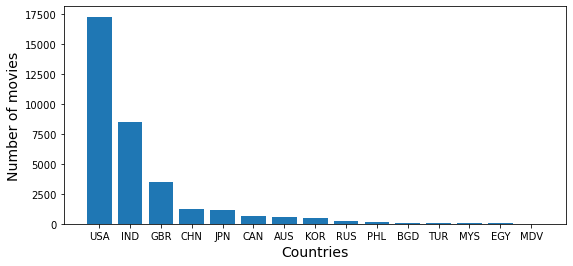

In [5]:
plt.figure(figsize=(9, 4))
plt.bar(x = df_new['iso_a3'], height = df_new['Count'])
plt.xlabel("Countries",size = 14)
plt.ylabel("Number of movies",size = 14)
plt.show()

In [6]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [7]:
map_toplot  = world.merge(df_new,how = 'left',on='iso_a3')

In [8]:
map_toplot = map_toplot.fillna(value = 0)

<Figure size 864x432 with 0 Axes>

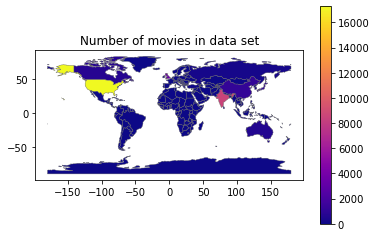

In [9]:
plt.figure(figsize=(12, 6))
map_toplot.plot(column="Count", cmap="plasma", linewidth=0.4, edgecolor=".4",legend=True)
#genreated heatmap on origin of the movies on map
plt.title('Number of movies in data set')
plt.show()

Text(0, 0.5, 'Count')

<Figure size 864x432 with 0 Axes>

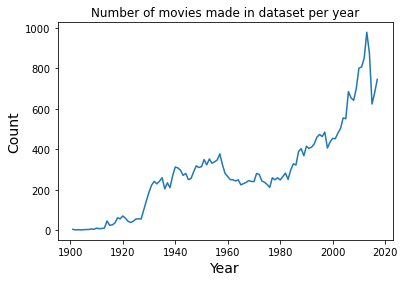

In [10]:
year_count = data2['Release Year'].value_counts().to_frame().reset_index()
year_count = year_count.rename(columns={"index": "year", "Release Year": "Count"})
year_count = year_count.sort_values(by = ['year'])
plt.figure(figsize=(12, 6))
year_count.plot(x='year', 
             y='Count', 
             title='Number of movies made in dataset per year',legend = False)
plt.xlabel("Year",size= 14)
plt.ylabel("Count",size= 14)
#data have movies form 1901 to 2017.

In [11]:
pop_rev = data2.dropna(subset= ['popularity','Revenue'])
pop = pop_rev['popularity'].to_list()

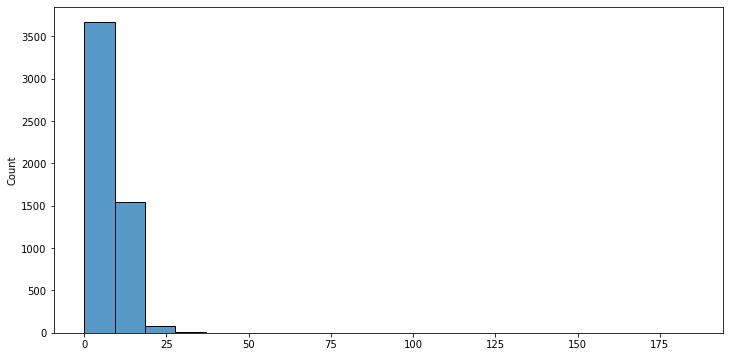

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(x = pop_rev['popularity'].to_list(), bins = 20)
plt.show()

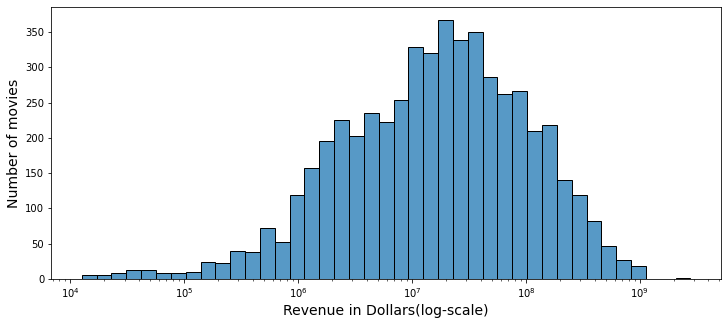

In [13]:
plt.figure(figsize=(12, 5))
sns.histplot(x = pop_rev['Revenue'].to_list(),log_scale=True)
plt.xlabel("Revenue in Dollars(log-scale)",size= 14)
plt.ylabel("Number of movies",size= 14)
plt.show()

In [14]:
data.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Wiki Page,Plot,Genre
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",set()
1,1901,Love by the Light of the Moon,American,Unknown,NaN,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",set()
2,1901,The Martyred Presidents,American,Unknown,NaN,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",{'short'}
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,"{'silent', 'short', 'comedy'}"
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,{'short'}


In [15]:
key_genre = [ 'drama', 'comedy', 'romance', 'action', 'thriller', 
             'adventure', 'crime', 'indie', 'musical', 'horror', 'documentary', 
             'animation', 'mystery', 'science-fiction', 'fantasy']
genre_count = {key: 0 for key in key_genre}

In [16]:
for index, row in data.iterrows():
    for i in key_genre:
        if i in row['Genre']:
            genre_count[i] = genre_count[i]+1

In [17]:
genre_count['sci-fi'] = genre_count.pop('science-fiction')
genre_count['anim.'] = genre_count.pop('animation')
genre_count = dict(sorted(genre_count.items(), key=lambda item: item[1],reverse=True))

In [18]:
genre_count

{'drama': 15140,
 'comedy': 9713,
 'romance': 6153,
 'action': 5728,
 'thriller': 4857,
 'adventure': 4170,
 'crime': 4035,
 'horror': 2229,
 'musical': 2063,
 'indie': 1753,
 'mystery': 1664,
 'sci-fi': 1492,
 'fantasy': 1384,
 'anim.': 1012,
 'documentary': 130}

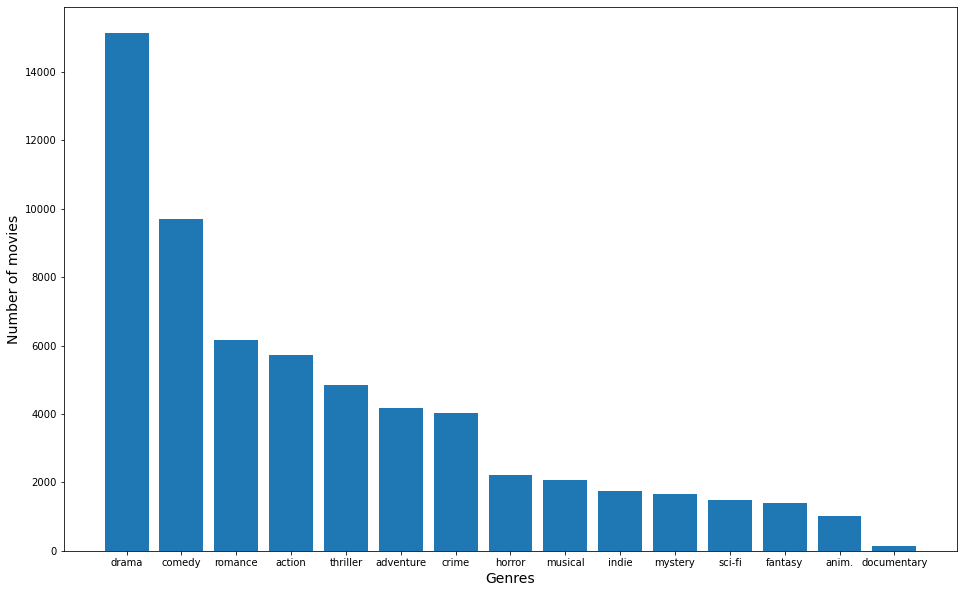

In [19]:
plt.figure(figsize=(16, 10))
plt.bar(range(len(genre_count)), list(genre_count.values()), align='center')
plt.xticks(range(len(genre_count)), list(genre_count.keys()))
plt.xlabel("Genres",size= 14)
plt.ylabel("Number of movies",size=14)
plt.show()

In [15]:
after_1990 = 0
for index, row in year_count.iterrows():
    if row['year']>1990:
        after_1990 = after_1990+ row['Count']

In [17]:
after_1990/len(data)

0.47099508491038056

In [19]:
17272/len(data)

0.5083438796833152

In [18]:
df_new

,iso_a3,Count
0,USA,17272
1,IND,8499
2,GBR,3479
3,CHN,1203
4,JPN,1116
5,CAN,690
6,AUS,556
7,KOR,516
8,RUS,229
9,PHL,124
